In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("marshalpatel3558/diabetes-prediction-dataset-legit-dataset")

print("Path to dataset files:", path)

d:\Skills\Data-Analysis-With-Python\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Arshad Ziban\.cache\kagglehub\datasets\marshalpatel3558\diabetes-prediction-dataset-legit-dataset\versions\1


In [3]:
import os

# List all files and subfolders in the dataset directory
print("Files in the dataset directory:")
print(os.listdir(path))

Files in the dataset directory:
['Dataset of Diabetes .csv']


In [4]:

# Use the actual file name you found
correct_file_name = "Dataset of Diabetes .csv" 
file_path = os.path.join(path, correct_file_name)

In [5]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv(file_path)
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [7]:
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [8]:
df.shape

(1000, 14)

In [9]:
df.dtypes

ID             int64
No_Pation      int64
Gender        object
AGE            int64
Urea         float64
Cr             int64
HbA1c        float64
Chol         float64
TG           float64
HDL          float64
LDL          float64
VLDL         float64
BMI          float64
CLASS         object
dtype: object

In [10]:
df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [11]:
df['CLASS'].value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [12]:
# Gender and CLASS are categorical
df['Gender'] = df['Gender'].astype('category')

In [13]:
df['CLASS'].value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [14]:
print(df['CLASS'].unique())

['N' 'N ' 'P' 'Y' 'Y ']


In [15]:
# Convert the 'CLASS' column to string type
df['CLASS'] = df['CLASS'].astype(str)

# Remove extra spaces from 'CLASS' values
df['CLASS'] = df['CLASS'].str.strip()

#map the values
class_mapping = {
    'N': 'Non-diabetic',
    'P': 'Prediabetic',
    'Y': 'Diabetic'
}

df['CLASS'] = df['CLASS'].map(class_mapping)


In [16]:
print(df['CLASS'].unique())


['Non-diabetic' 'Prediabetic' 'Diabetic']


In [17]:
df['CLASS'].value_counts()

CLASS
Diabetic        844
Non-diabetic    103
Prediabetic      53
Name: count, dtype: int64

In [18]:
df['CLASS'] = df['CLASS'].astype('category')

In [19]:
df['CLASS'].value_counts()

CLASS
Diabetic        844
Non-diabetic    103
Prediabetic      53
Name: count, dtype: int64

In [20]:
# Convert other columns to numeric
numeric_cols = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [21]:
# Check for missing values after conversion
df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [22]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['CLASS'] = label_encoder.fit_transform(df['CLASS'])

In [23]:
df = df.drop(['ID', 'No_Pation'], axis=1)

# Exploratory Data Analysis

In [24]:
df.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.567000,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020,0.209000
std,0.497754,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388,0.521144
min,0.000000,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,0.000000
25%,0.000000,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,0.000000
50%,1.000000,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,0.000000
75%,1.000000,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,0.000000
max,2.000000,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000,2.000000


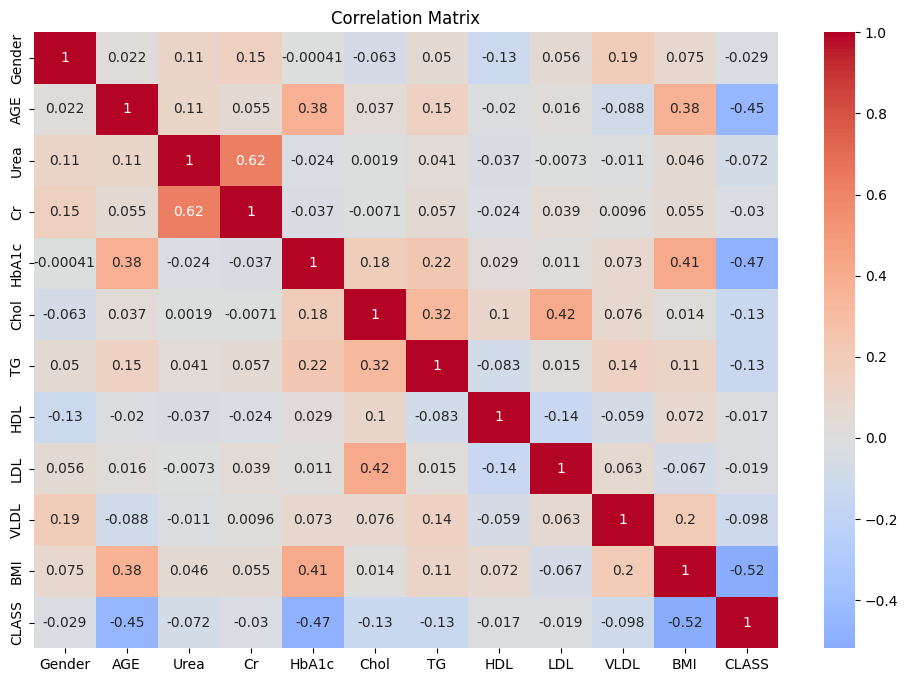

In [25]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

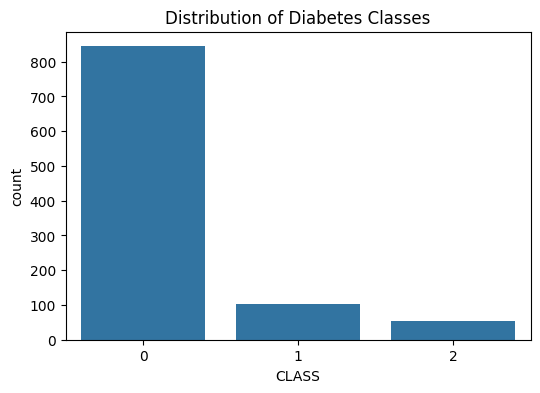

In [26]:
# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='CLASS', data=df)
plt.title('Distribution of Diabetes Classes')
plt.show()

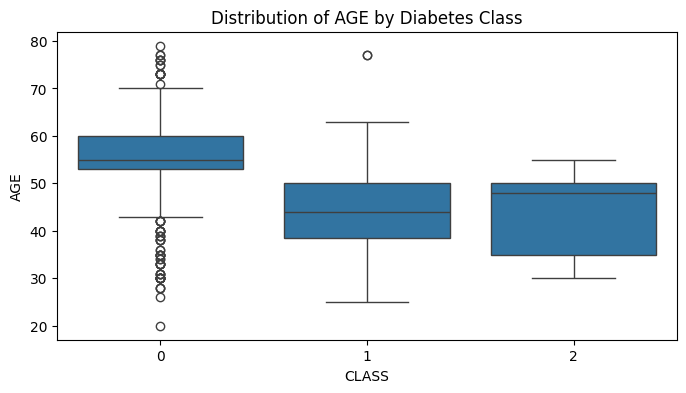

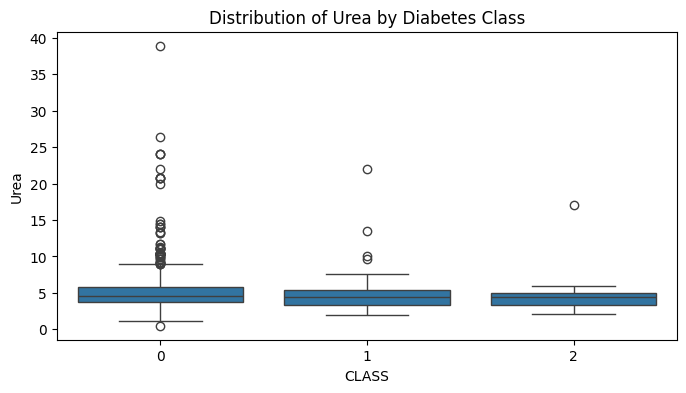

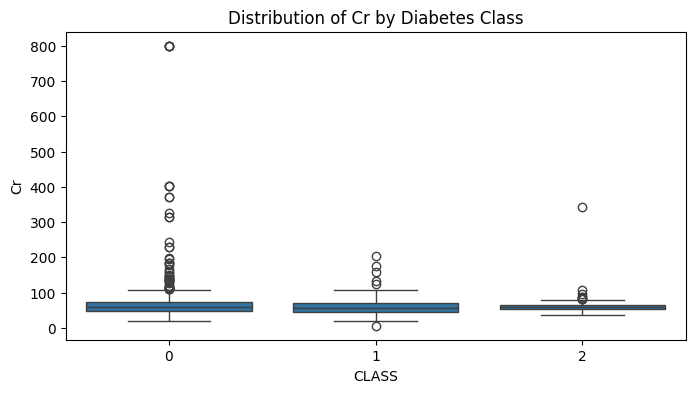

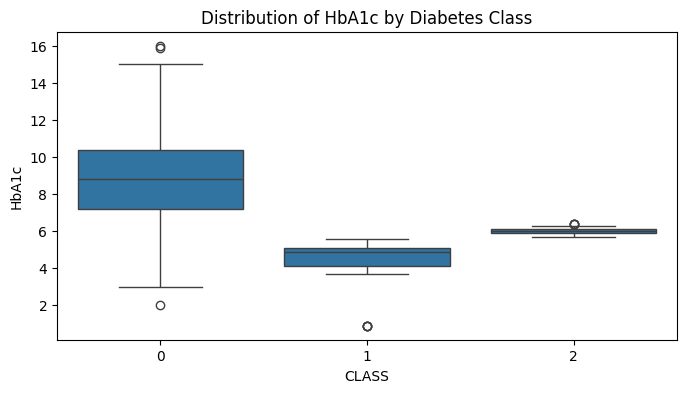

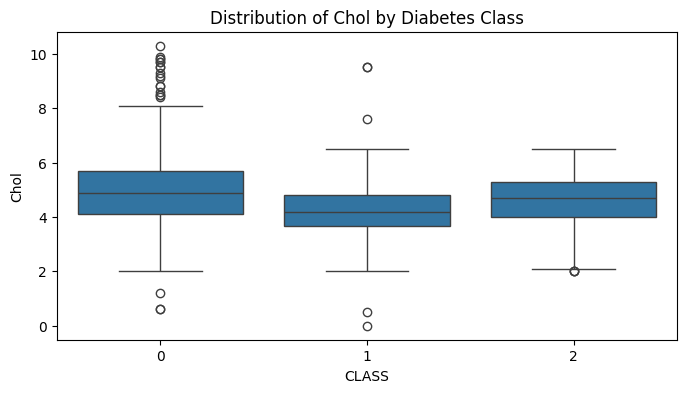

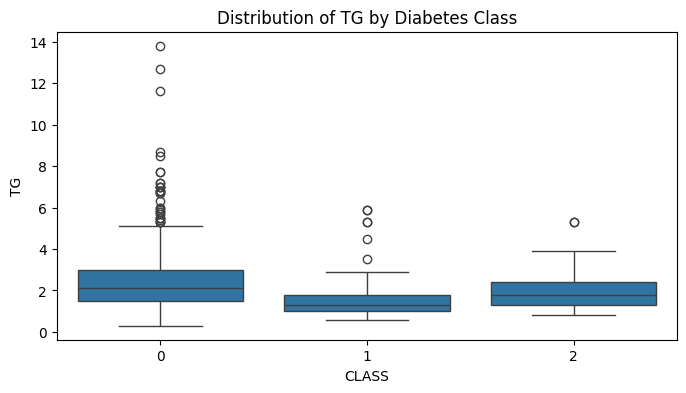

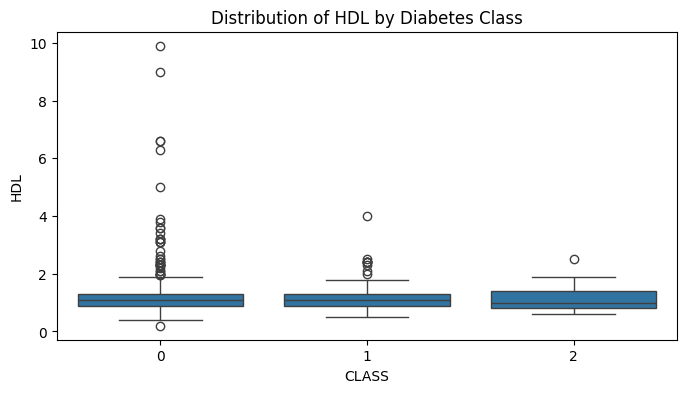

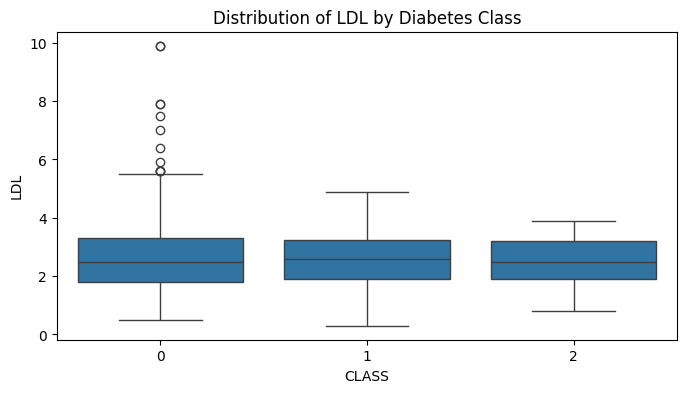

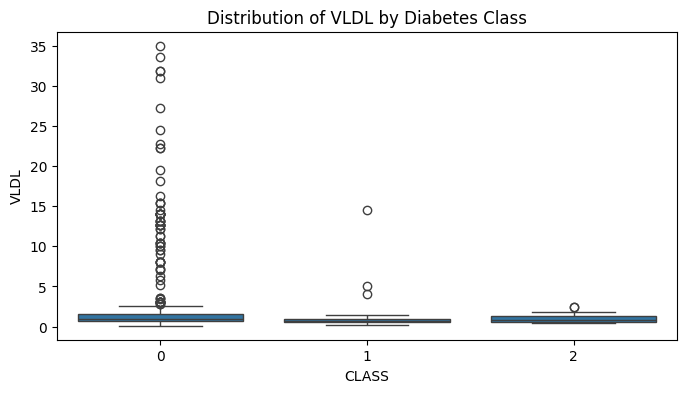

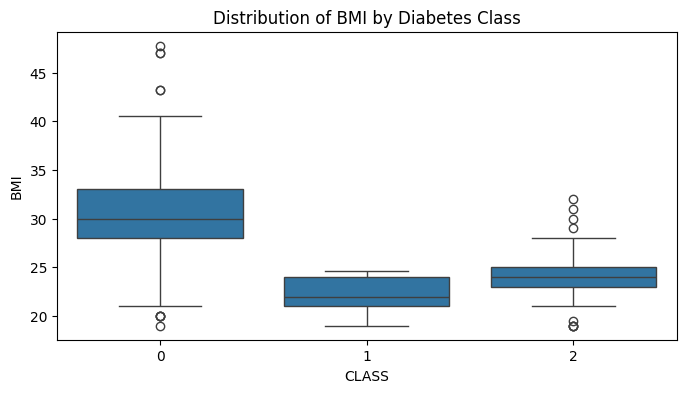

In [27]:
# Boxplots for numeric features by class
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='CLASS', y=col, data=df)
    plt.title(f'Distribution of {col} by Diabetes Class')
    plt.show()

# Decision Tree Implementation

In [28]:
# Prepare data for modeling
X = df.drop('CLASS', axis=1)
y = df['CLASS']

In [29]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Initialize and train Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [31]:
# Make predictions
y_pred = dt_classifier.predict(X_test)